## <font color=Yellow size=20>Manjeel Chalise
KCE080BCT015
</script>

# Wine Quality Prediction 

##  Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

## Source:https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
df.shape

(1143, 13)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


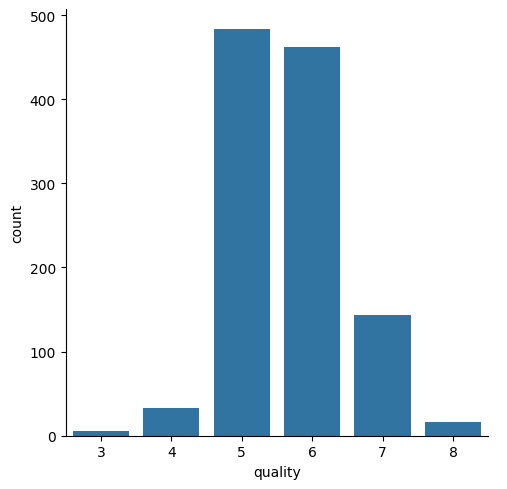

In [7]:
sns.catplot(x='quality',data=df,kind='count')

In [9]:
def categorize_quality(q):
    if q <= 4:
        return "Bad"
    elif 5 <= q <= 6:
        return "Average"
    else:
        return "Excellent"
df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'])


0       Average
1       Average
2       Average
3       Average
4       Average
         ...   
1138    Average
1139    Average
1140    Average
1141    Average
1142    Average
Name: quality_category, Length: 1143, dtype: object


In [10]:

category_counts = df['quality_category'].value_counts()
print(category_counts)


quality_category
Average      945
Excellent    159
Bad           39
Name: count, dtype: int64


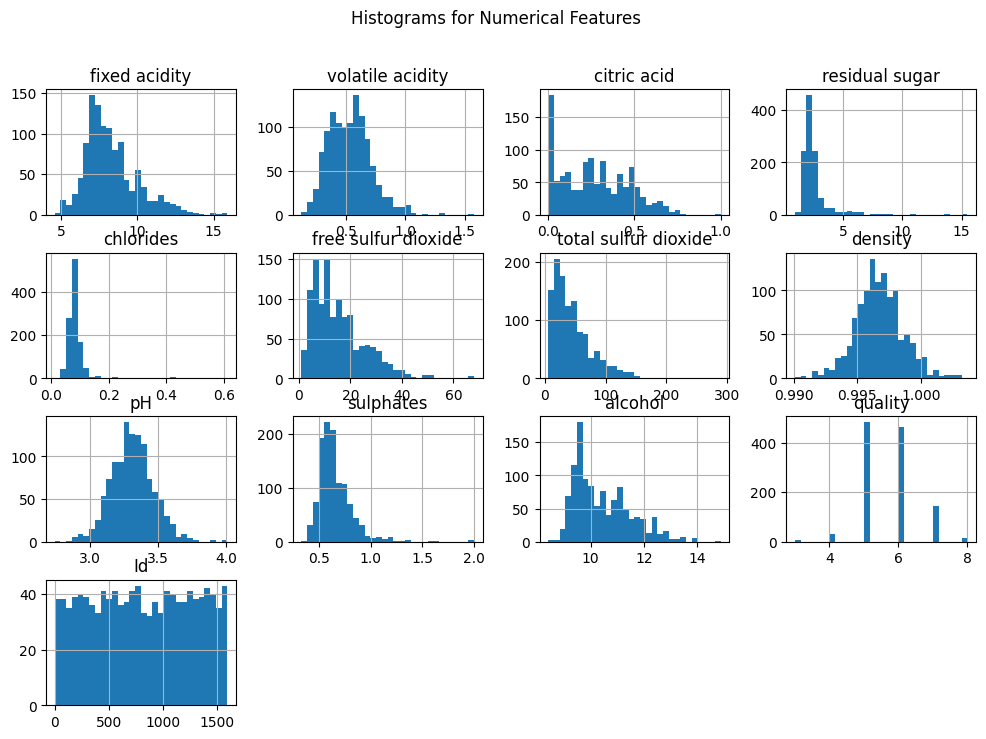

In [11]:
df.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms for Numerical Features')
plt.show()


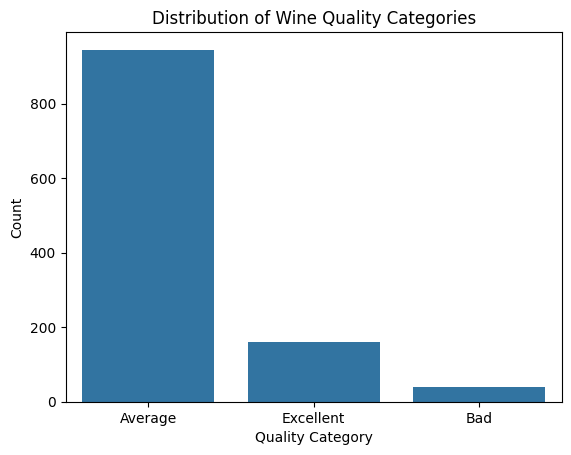

In [12]:

sns.countplot(x='quality_category', data=df)
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()


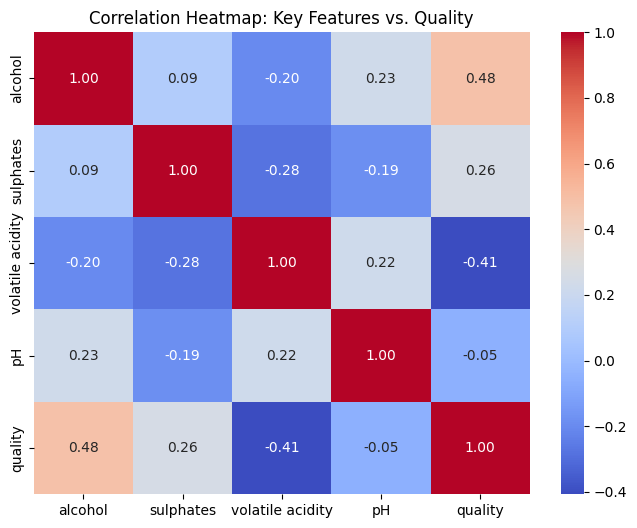

In [13]:
# Calculate the correlation between numerical features, including quality
corr = df[['alcohol', 'sulphates', 'volatile acidity', 'pH', 'quality']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Key Features vs. Quality')
plt.show()


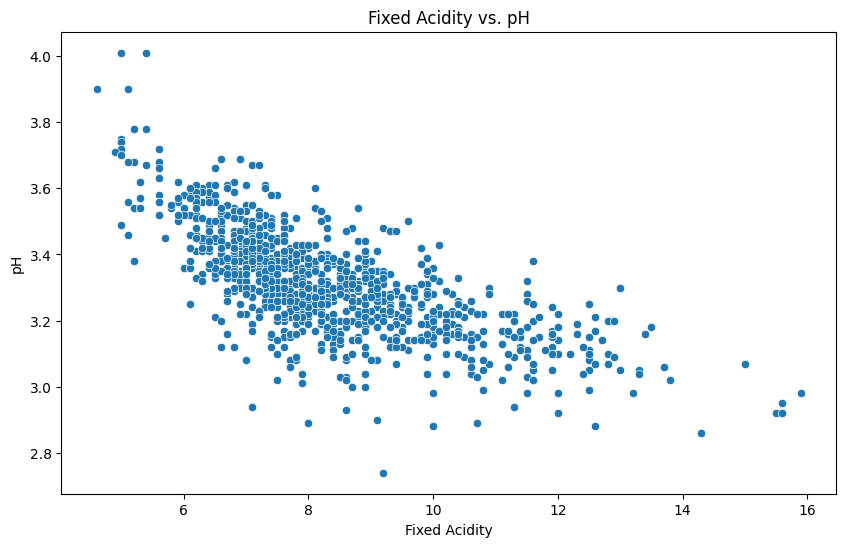

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='pH', data=df)
plt.title('Fixed Acidity vs. pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

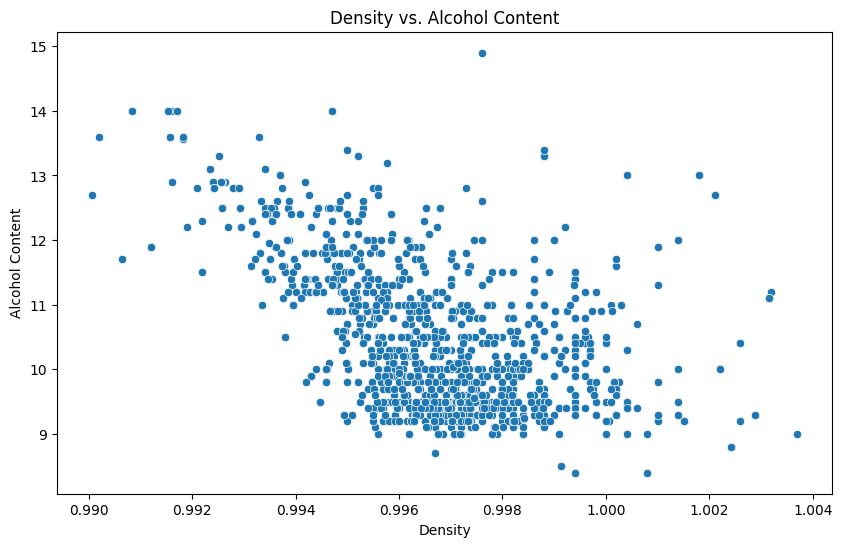

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data=df)
plt.title('Density vs. Alcohol Content')
plt.xlabel('Density')
plt.ylabel('Alcohol Content')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11400\3877037007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality_category', y='alcohol', data=df, palette="viridis")


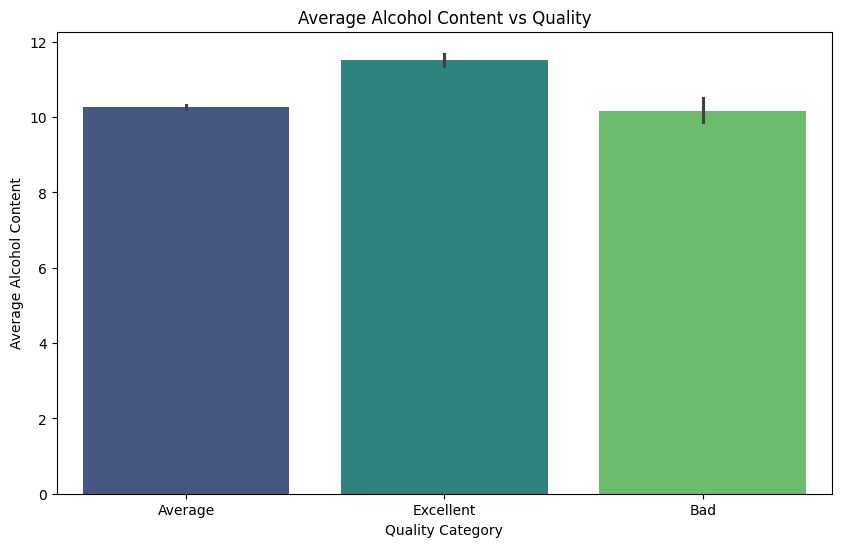

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality_category', y='alcohol', data=df, palette="viridis")
plt.title('Average Alcohol Content vs Quality')
plt.xlabel('Quality Category')
plt.ylabel('Average Alcohol Content')
plt.show()

In [18]:

# Percentage of wines within pH range 3.0–4.0
pH_in_range = df[(df['pH'] >= 3.0) & (df['pH'] <= 4.0)]
percentage_in_range = len(pH_in_range) / len(df) * 100
print(f"Percentage of wines with pH in the range 3.0–4.0: {percentage_in_range:.2f}%")


Percentage of wines with pH in the range 3.0–4.0: 97.73%


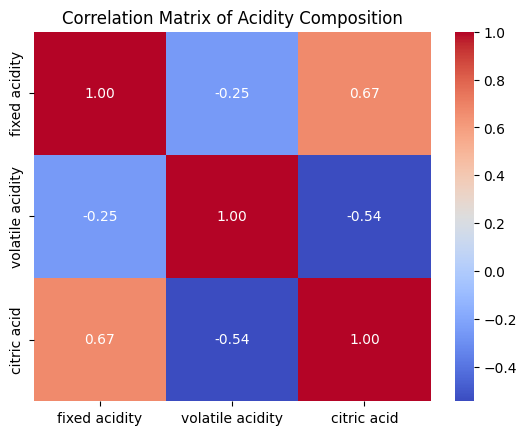

In [19]:

correlation_matrix = df[['fixed acidity', 'volatile acidity', 'citric acid']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Acidity Composition')
plt.show()


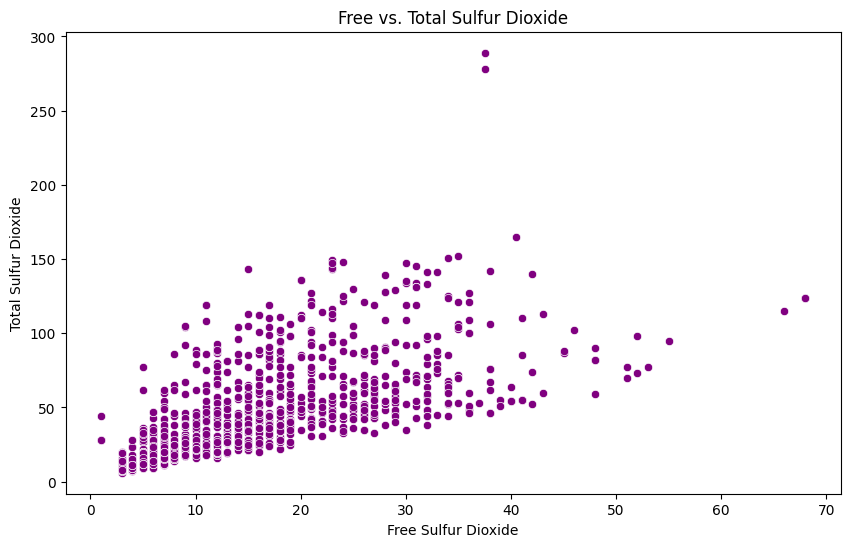

In [20]:
# Scatter plot to check the relationship between free and total sulfur dioxide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df, color='purple')
plt.title('Free vs. Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()


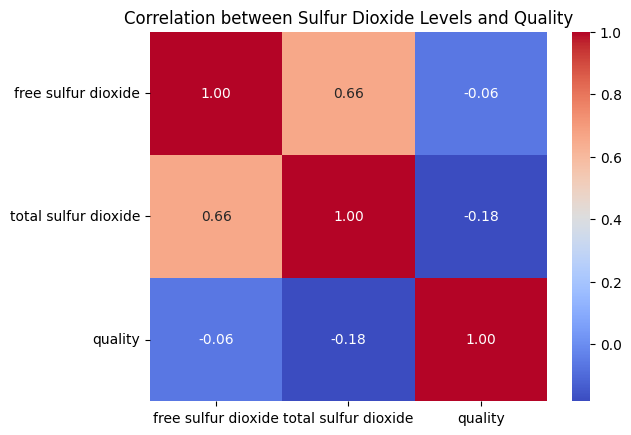

In [22]:
# Correlation between sulfur dioxide levels and quality
correlation_sulfur_quality = df[['free sulfur dioxide', 'total sulfur dioxide', 'quality']].corr()
sns.heatmap(correlation_sulfur_quality, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sulfur Dioxide Levels and Quality')
plt.show()


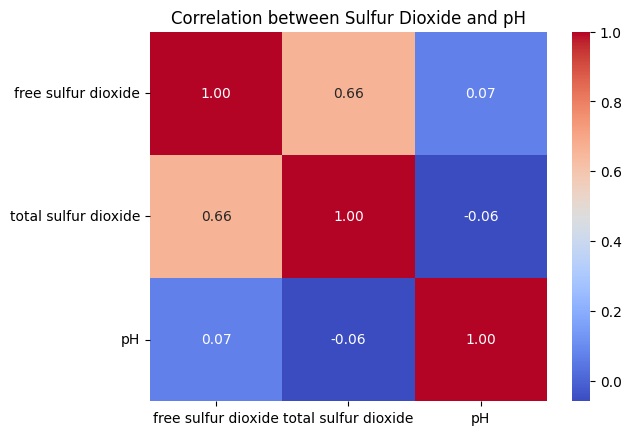

In [23]:
# Correlation between sulfur dioxide levels and pH
correlation_sulfur_ph = df[['free sulfur dioxide', 'total sulfur dioxide', 'pH']].corr()
sns.heatmap(correlation_sulfur_ph, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sulfur Dioxide and pH')
plt.show()


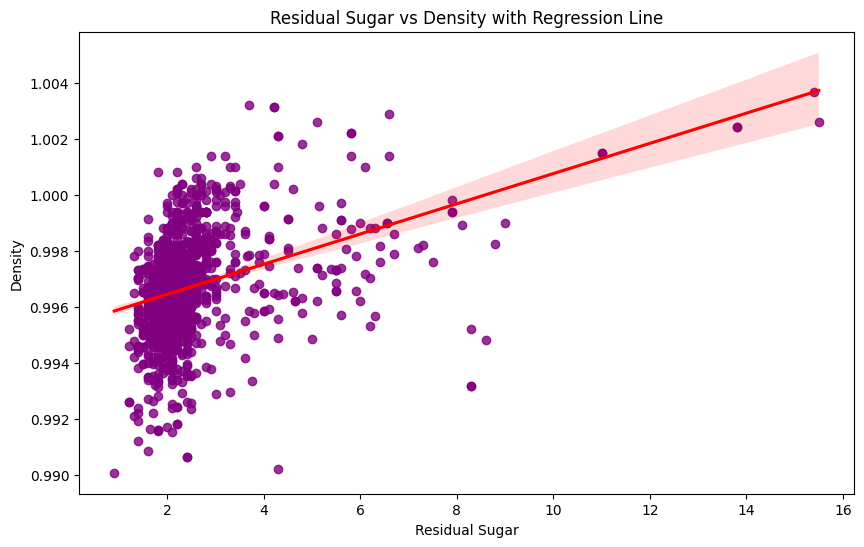

In [24]:
# Scatter plot with regression line for residual sugar vs density
plt.figure(figsize=(10, 6))
sns.regplot(x='residual sugar', y='density', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Residual Sugar vs Density with Regression Line')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.show()


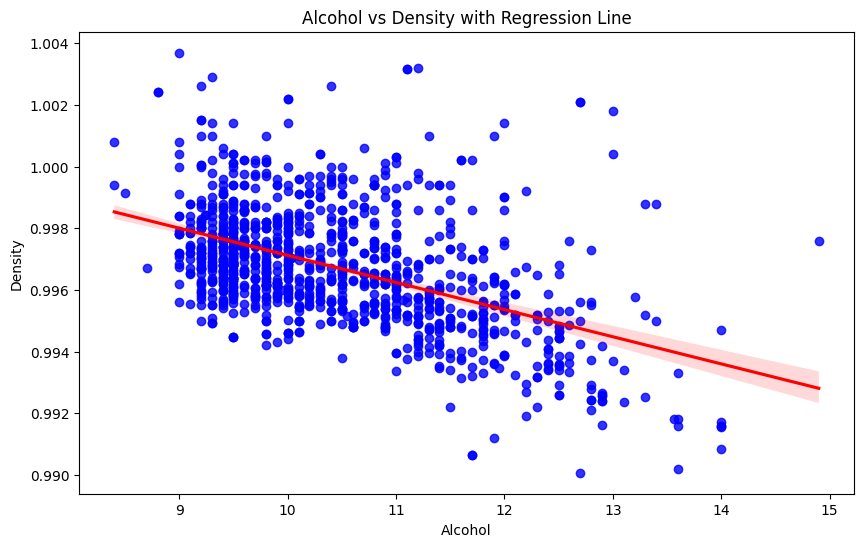

In [25]:
# Scatter plot with regression line for alcohol vs density
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='density', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Alcohol vs Density with Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()


In [26]:
# Creating the Acidity Ratio feature
df['acidity_ratio'] = df['fixed acidity'] / df['volatile acidity']


In [27]:
# Creating the Sulfur Balance feature
df['sulfur_balance'] = df['free sulfur dioxide'] / df['total sulfur dioxide']


In [28]:
# Creating the Sugar-Alcohol Ratio feature
df['sugar_alcohol_ratio'] = df['residual sugar'] / df['alcohol']


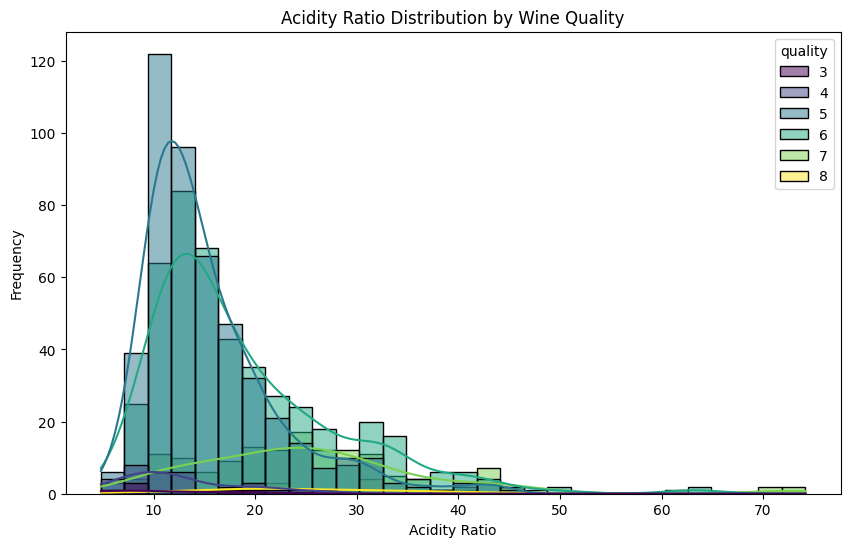

In [30]:
# Plotting the distribution of Acidity Ratio based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='acidity_ratio', hue='quality', kde=True, bins=30, palette='viridis')
plt.title('Acidity Ratio Distribution by Wine Quality')
plt.xlabel('Acidity Ratio')
plt.ylabel('Frequency')
plt.show()


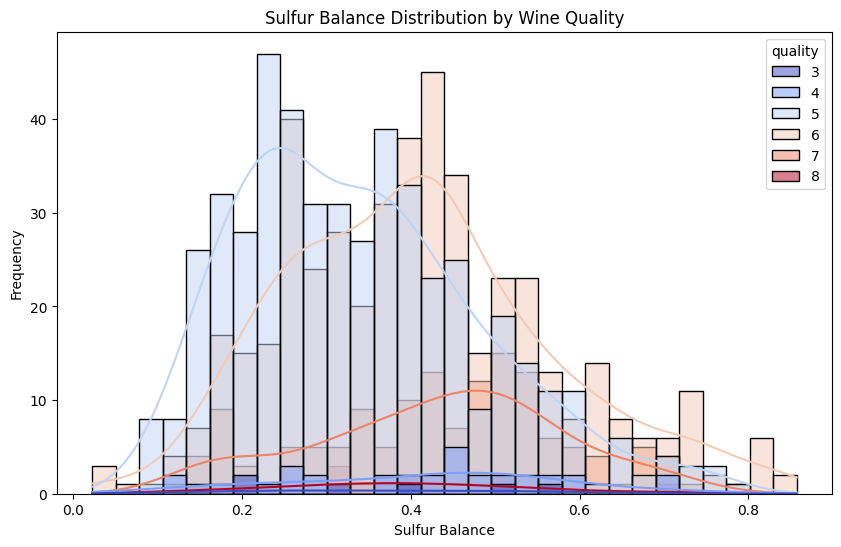

In [31]:
# Plotting the distribution of Sulfur Balance based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sulfur_balance', hue='quality', kde=True, bins=30, palette='coolwarm')
plt.title('Sulfur Balance Distribution by Wine Quality')
plt.xlabel('Sulfur Balance')
plt.ylabel('Frequency')
plt.show()


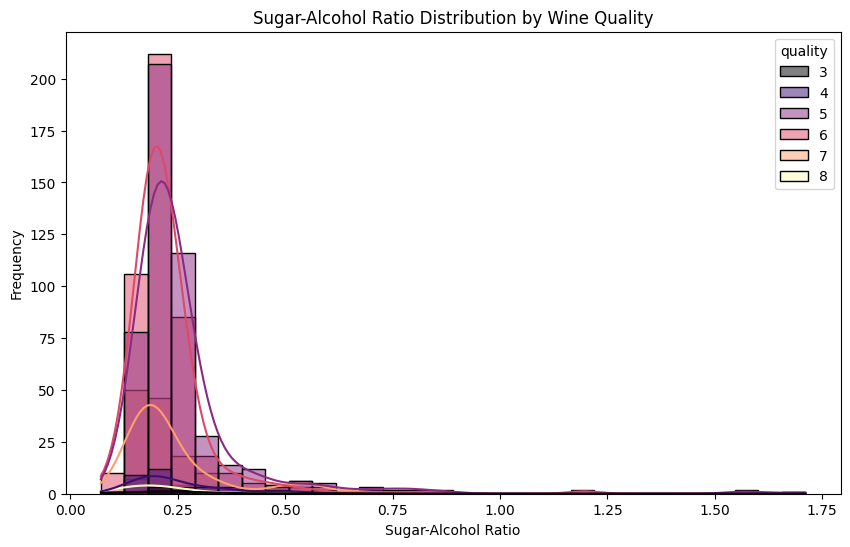

In [32]:
# Plotting the distribution of Sugar-Alcohol Ratio based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sugar_alcohol_ratio', hue='quality', kde=True, bins=30, palette='magma')
plt.title('Sugar-Alcohol Ratio Distribution by Wine Quality')
plt.xlabel('Sugar-Alcohol Ratio')
plt.ylabel('Frequency')
plt.show()


## Separation of columns

In [13]:
## Input features
X = df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [44]:
# Division of Output feature into good(1) and bad(0)
y = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
y

0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: quality, Length: 1143, dtype: int64

In [45]:
##Splitting of data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)##Converts 20% of the data to test data


In [46]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
1090,7.9,0.29,0.49,2.20,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,1528
956,11.5,0.42,0.48,2.60,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,1344
317,11.9,0.39,0.69,2.80,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,450
591,7.1,0.48,0.28,2.80,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,824
729,8.7,0.41,0.41,6.20,0.078,25.0,42.0,0.99530,3.24,0.77,12.6,1038
...,...,...,...,...,...,...,...,...,...,...,...,...
232,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,326
1007,6.2,0.58,0.00,1.60,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,1415
950,6.0,0.50,0.00,1.40,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,1337
81,9.4,0.40,0.31,2.20,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,115


### Random forest model uses different decision trees and according to the average of their results the final result is determined

In [55]:
model=RandomForestClassifier()

In [48]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(914, 12)
(914,)


In [56]:
model.fit(X_train, y_train)



RandomForestClassifier()

In [60]:
X_test_accurcy = model.predict(X_test)
predction_accuracy=accuracy_score(X_test_accurcy,y_test)

c:\Users\ACER\Documents\projects\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [61]:
print(predction_accuracy)

0.7641921397379913
